### Lesson_3_Introduction to graphics on a plane

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

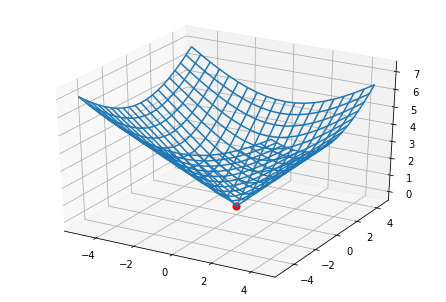

In [16]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)
# Z = 2*X + 35*Y
# Z = X**2 + Y**2
Z = np.sqrt(X**2 + Y**2)
ax.plot_wireframe(X, Y, Z)
# ax.plot_surface(X, Y, Z)
ax.scatter(0, 0, 0, 'z', 50, 'red')
show()

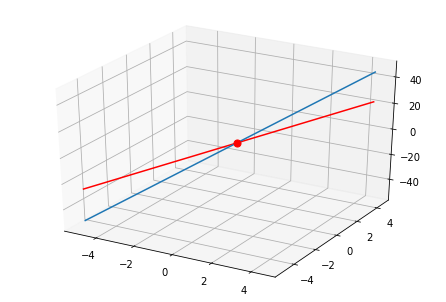

In [19]:
fig = figure()
ax =Axes3D(fig)
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
Z = 2*X + 3*Y
ax.plot(X, Y, Z, 'red')
ax.plot(X, Y, 2*Z)
ax.scatter(0, 0, 0, 'z', 50, 'red')
show()

#### 1. Задание (в программе)
Нарисуйте график функции: y(x) = k∙cos(x – a) + b для некоторых (2-3 различных) значений параметров k, a, b

In [6]:
x = np.linspace(-np.pi, np.pi, 201)

In [7]:
def y(x, k, a, b):
    return k*np.cos(x-a)+b

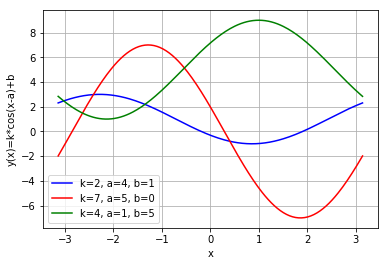

In [8]:
k, a, b = 2, 4, 1
plt.plot(x, y(x, k, a, b), label=f'k={k}, a={a}, b={b}', color='blue')
k, a, b = 7, 5, 0
plt.plot(x, y(x, k, a, b), label=f'k={k}, a={a}, b={b}', color='red')
k, a, b = 4, 1, 5
plt.plot(x, y(x, k, a, b), label=f'k={k}, a={a}, b={b}', color='green')
plt.xlabel('x')
plt.ylabel('y(x)=k*cos(x-a)+b')
plt.grid(True)
plt.legend()

#### 2. Задание
Докажите, что при ортогональном преобразовании сохраняется расстояние между точками. Нарисуйте график окружности в полярных координатах.

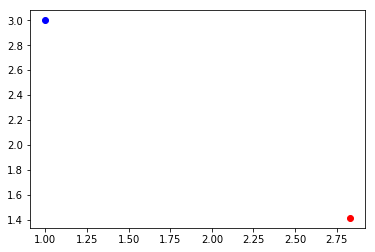

In [10]:
x, y = 1, 3
a = np.pi / 4 
sin_a = np.sin(a)
cos_a = np.cos(a)
x1, y1 = x*sin_a + y*cos_a, x*-sin_a + y*cos_a
plt.plot(x, y, color='blue', marker='o')
plt.plot(x1, y1, color='red', marker='o')

In [11]:
norm = np.round(np.linalg.norm([x, y]), 4)
norm1 = np.round(np.linalg.norm([x1, y1]), 4)
print(norm, norm1)

3.1623 3.1623


In [12]:
print(norm == norm1)

True


При линейном преобразовании расстояние между точками сохранилось. 
Докажем, что преобразование является ортогональным.

Условия ортогональности линейного преобразования:
- a11^2 + a12^2 = 1
- a21^2 + a22^2 = 1
- a11*a12 + a21*a22 = 0
- a11*a22 - a12*a21 != 0

In [14]:
a11, a12, a21, a22 = sin_a, cos_a, -sin_a, cos_a

print(f'a11^2 + a12^2 = 1: {np.round(a11**2 + a12**2, 1) == 1.0}')
print(f'a21^2 + a22^2 = 1: {np.round(a21**2 + a22**2, 1) == 1.0}')
print(f'a11*a12 + a21*a22 = 0: {np.round(a11*a12 + a21*a22, 1) == 0.0}')
print(f'a11*a12 + a21*a22 = 0: {np.round(a11*a22 - a12*a21, 1) != 0.0}')

a11^2 + a12^2 = 1: True
a21^2 + a22^2 = 1: True
a11*a12 + a21*a22 = 0: True
a11*a12 + a21*a22 = 0: True


Из вычислений выше, мы видим, что наше линейное преобразование точек является ортогональным. Так как расстояние между точками сохранились, то мы можем сделать вывод, что при ортогональным преобразование расстояние между точками сохраняется.

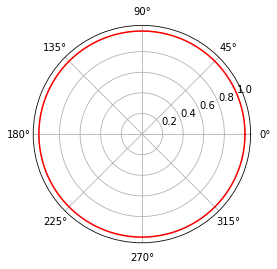

In [16]:
R = 1
phi = np.linspace(0, 2 * np.pi, 201)
r = np.linspace(R, R, 201)
plt.polar(phi, r, color='red')

#### 3. Задание (в программе)
Напишите код, который будет переводить полярные координаты в декартовы. Напишите код, который будет рисовать график окружности в полярных координатах. Напишите код, который будет рисовать график прямой линии в полярных координатах.

In [18]:
# R - radius and a - angle in degrees
def polar_to_cartesian(R, a):
    x = R * np.cos(np.radians(a))
    y = R * np.sin(np.radians(a))
    return x, y

In [19]:
print(polar_to_cartesian(10, 30))

(8.660254037844387, 4.999999999999999)


In [20]:
def polar_circle(R=1):
    phi = np.linspace(0, 2 * np.pi, 201)
    r = np.linspace(R, R, 201)
    plt.polar(phi, r, color='blue')
    plt.show()

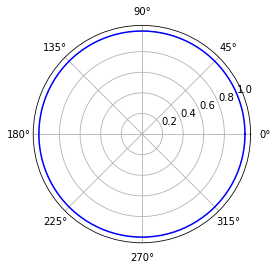

In [21]:
polar_circle()

In [22]:
def polar_line(R=1, a=45):
    phi = np.array([np.radians(a), np.radians(a)])
    r = np.array([0, R])
    plt.polar(phi, r)
    plt.show()

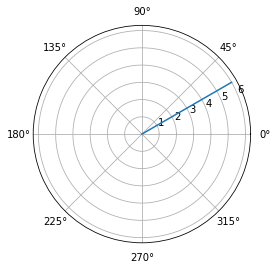

In [23]:
polar_line(R=6, a=30)

#### 4. Задание (в программе)
- Решите систему уравнений:
y = x2 – 1
exp(x) + x∙(1 – y) = 1


- Решите систему уравнений и неравенств:
y = x2 – 1
exp(x) + x∙(1 – y) > 1

In [24]:
from scipy.optimize import fsolve

In [27]:
def equitations(p):
    x, y = p
    return y - x**2 + 1, np.exp(x) + x*(1-y) - 1

x1, y1 = fsolve(equitations, (0, 0))

print(x1, y1)

-8.12539509656948e-21 -1.0


In [28]:
# подберем начальную точку для решения уравнения, которая удовлетворяет неравенству
x = 0
while True:
    y = x**2 - 1
    if np.exp(x) + x*(1-y) > 1:
        print(f'x: {x}, y: {y}')
        break
    else:
        x += 1

x: 1, y: 0


In [30]:
# проверка:
print(np.exp(x) + x*(1-0) - 1 > 0)

True


In [31]:
# подставим найденную точку для поиска корней уравнения
x2, y2 = fsolve(equitations, (1, 0))

print(x2, y2)

6.518257539454072e-15 -1.000000000000011
